In [1]:
import findspark
findspark.init()

In [2]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("spark").getOrCreate()

In [3]:
house_df = spark.read.csv("new_house_data.csv", 
                      header='true', 
                      inferSchema='true')

In [4]:
house_df.show()

+--------+---------+-----------+--------+------+-------+
|bedrooms|bathrooms|sqft_living|sqft_lot|floors|  price|
+--------+---------+-----------+--------+------+-------+
|       3|      1.0|       1180|    5650|   1.0| 221900|
|       3|     2.25|       2570|    7242|   2.0| 538000|
|       2|      1.0|        770|   10000|   1.0| 180000|
|       4|      3.0|       1960|    5000|   1.0| 604000|
|       3|      2.0|       1680|    8080|   1.0| 510000|
|       4|      4.5|       5420|  101930|   1.0|1225000|
|       3|     2.25|       1715|    6819|   2.0| 257500|
|       3|      1.5|       1060|    9711|   1.0| 291850|
|       3|      1.0|       1780|    7470|   1.0| 229500|
|       3|      2.5|       1890|    6560|   2.0| 323000|
|       3|      2.5|       3560|    9796|   1.0| 662500|
|       2|      1.0|       1160|    6000|   1.0| 468000|
|       3|      1.0|       1430|   19901|   1.5| 310000|
|       3|     1.75|       1370|    9680|   1.0| 400000|
|       5|      2.0|       1810

In [5]:
house_df.describe().show()

+-------+------------------+-----------------+-----------------+------------------+------------------+-----------------+
|summary|          bedrooms|        bathrooms|      sqft_living|          sqft_lot|            floors|            price|
+-------+------------------+-----------------+-----------------+------------------+------------------+-----------------+
|  count|              2999|             2999|             2999|              2999|              2999|             2999|
|   mean|3.3904634878292765|2.076692230743581|2075.737912637546|15336.094698232744|1.4399799933311104|534389.8856285429|
| stddev|0.8946820977054409|0.761718718368927|916.4128263571964|  43114.4364017653|0.5096455879825704|380224.9036052091|
|    min|                 0|              0.0|              380|               649|               1.0|            75000|
|    max|                 8|              6.0|             8010|           1651359|               3.5|          5350000|
+-------+------------------+----

In [6]:
house_df.printSchema()


root
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- price: integer (nullable = true)



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

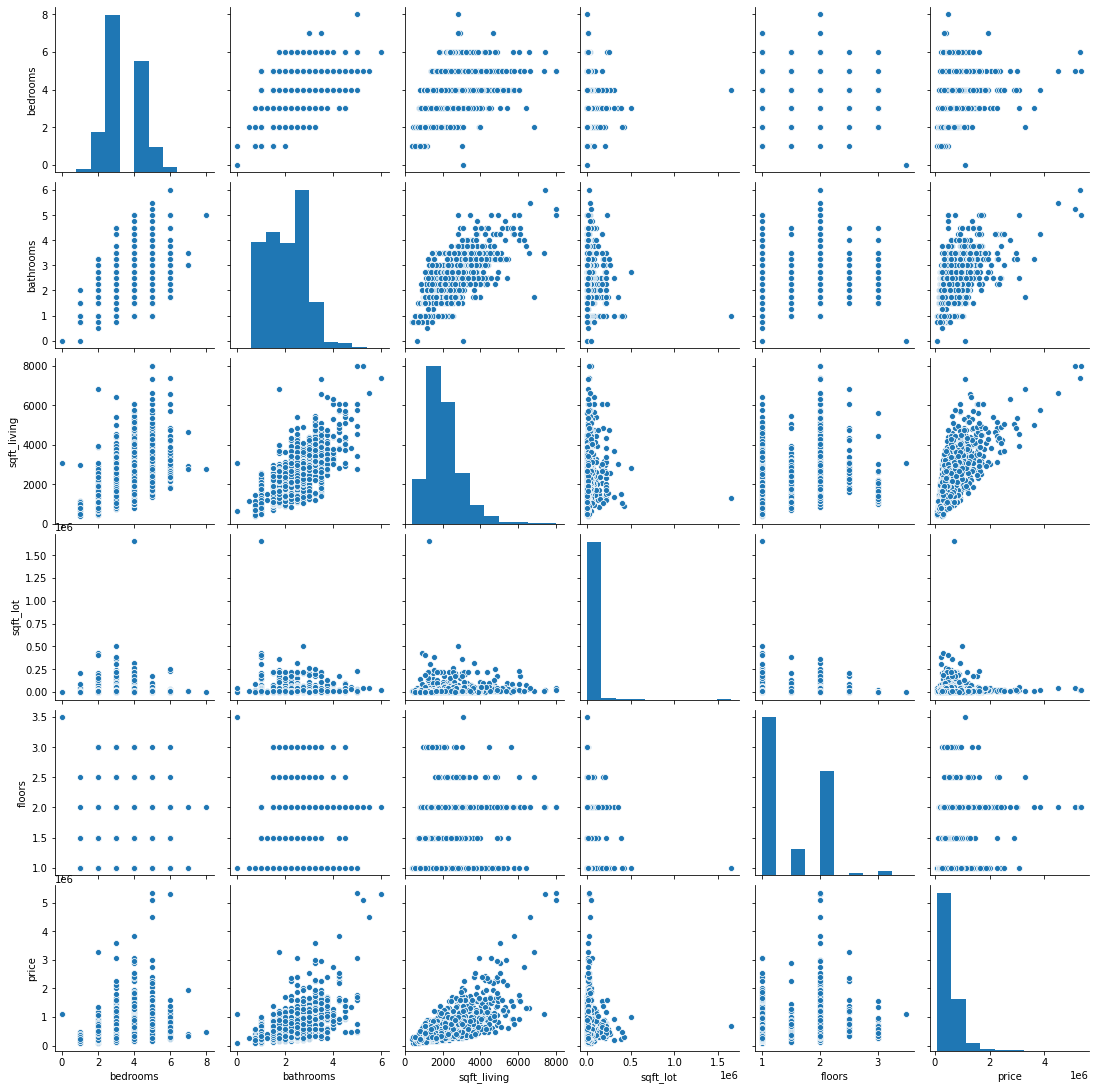

In [8]:
descriptionA_df=house_df.toPandas()
sns.pairplot(descriptionA_df)
plt.show()

In [ ]:
type(house_df)

In [ ]:
type(descriptionA_df)

In [ ]:
 house_df.columns

In [ ]:
print((house_df.count(),len(house_df.columns)))

In [9]:
INCOL=house_df.columns[:-1]

In [10]:
from pyspark.ml.feature import VectorAssembler
assembler=VectorAssembler(inputCols=INCOL,outputCol='features')
output_data=assembler.transform(house_df)

In [11]:
output_data.printSchema()

root
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: integer (nullable = true)
 |-- sqft_lot: integer (nullable = true)
 |-- floors: double (nullable = true)
 |-- price: integer (nullable = true)
 |-- features: vector (nullable = true)



In [12]:
output_data.show()

+--------+---------+-----------+--------+------+-------+--------------------+
|bedrooms|bathrooms|sqft_living|sqft_lot|floors|  price|            features|
+--------+---------+-----------+--------+------+-------+--------------------+
|       3|      1.0|       1180|    5650|   1.0| 221900|[3.0,1.0,1180.0,5...|
|       3|     2.25|       2570|    7242|   2.0| 538000|[3.0,2.25,2570.0,...|
|       2|      1.0|        770|   10000|   1.0| 180000|[2.0,1.0,770.0,10...|
|       4|      3.0|       1960|    5000|   1.0| 604000|[4.0,3.0,1960.0,5...|
|       3|      2.0|       1680|    8080|   1.0| 510000|[3.0,2.0,1680.0,8...|
|       4|      4.5|       5420|  101930|   1.0|1225000|[4.0,4.5,5420.0,1...|
|       3|     2.25|       1715|    6819|   2.0| 257500|[3.0,2.25,1715.0,...|
|       3|      1.5|       1060|    9711|   1.0| 291850|[3.0,1.5,1060.0,9...|
|       3|      1.0|       1780|    7470|   1.0| 229500|[3.0,1.0,1780.0,7...|
|       3|      2.5|       1890|    6560|   2.0| 323000|[3.0,2.5

In [13]:
#corretion analysis
for i in house_df.columns:
    print("Correlation to out come for {} is {}".format(i,house_df.stat.corr("Price",i)))

Correlation to out come for bedrooms is 0.2950261689291651
Correlation to out come for bathrooms is 0.5173782472435977
Correlation to out come for sqft_living is 0.7013258025402673
Correlation to out come for sqft_lot is 0.07004685258521577
Correlation to out come for floors is 0.26542463360056295
Correlation to out come for price is 1.0


In [18]:
#craete final data
from pyspark.ml.regression import LinearRegression
final_data=output_data.select('features','price')

In [19]:
final_data.printSchema()

root
 |-- features: vector (nullable = true)
 |-- price: integer (nullable = true)



In [20]:
final_data.show(3)

+--------------------+------+
|            features| price|
+--------------------+------+
|[3.0,1.0,1180.0,5...|221900|
|[3.0,2.25,2570.0,...|538000|
|[2.0,1.0,770.0,10...|180000|
+--------------------+------+
only showing top 3 rows



In [21]:
train,test=output_data.randomSplit([0.01,0.005])
models=LinearRegression(featuresCol ='features',labelCol='price',maxIter=100, regParam=0.0)
model=models.fit(train)
print("Coefficients: " + str(model.coefficients))

Coefficients: [-68453.89012663417,8843.186187504445,327.6812149977719,-0.05425030323182809,-21050.176597955364]


In [22]:
summary=model.summary
print("RMSE: %f" % summary.rootMeanSquaredError)



RMSE: 264937.899757


In [25]:
predictions=model.evaluate(test)

In [24]:
predictions.predictions.show(100)

+--------+---------+-----------+--------+------+-------+--------------------+------------------+
|bedrooms|bathrooms|sqft_living|sqft_lot|floors|  price|            features|        prediction|
+--------+---------+-----------+--------+------+-------+--------------------+------------------+
|       0|      0.0|       3064|    4764|   3.5|1095000|[0.0,0.0,3064.0,4...|1028492.4923077183|
|       1|     0.75|        430|    5050|   1.0|  80000|[1.0,0.75,430.0,5...|156168.59742574528|
|       1|      1.0|        660|    2600|   1.0| 250000|[1.0,1.0,660.0,26...|233878.98666502687|
|       1|      1.0|        680|    1638|   1.0| 252000|[1.0,1.0,680.0,16...|240484.79975669133|
|       1|      1.0|        730|    6890|   1.0| 140000|[1.0,1.0,730.0,68...|256583.93791400635|
|       1|      1.0|        870|   26326|   1.0| 157000|[1.0,1.0,870.0,26...|301404.89912008063|
|       1|      1.0|        900|    4368|   1.0| 152900|[1.0,1.0,900.0,43...|312426.56372837827|
|       1|      1.0|        93

In [26]:
t=model.transform(test)

In [27]:
t.select('price','prediction').show()

+-------+------------------+
|  price|        prediction|
+-------+------------------+
|1095000|1028492.4923077183|
|  80000|156168.59742574528|
| 250000|233878.98666502687|
| 252000|240484.79975669133|
| 140000|256583.93791400635|
| 157000|301404.89912008063|
| 152900|312426.56372837827|
| 210000| 322107.2150910884|
| 420850| 330103.0690366308|
| 463500| 374448.2697491931|
| 200000| 332017.1115976075|
| 415000| 966955.2287575288|
| 290000| 90814.50070964335|
| 405000|326380.63047153415|
| 562100|418745.97235622373|
|  82500|118479.15095472775|
| 265000| 152200.6672835011|
| 190000|155410.20905747137|
| 315000|155380.37139069382|
| 245000|181607.23765965248|
+-------+------------------+
only showing top 20 rows

